In [2]:
from pathlib import Path
import pandas as pd

DATA_PATH = Path("../data/sample/paysim_sample.csv")
df = pd.read_csv(DATA_PATH)

print("Loaded:", DATA_PATH)
print("Shape:", df.shape)
print("Columns:", list(df.columns))

Loaded: ../data/sample/paysim_sample.csv
Shape: (10000, 11)
Columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [4]:
import numpy as np

#Total n.o of transactions
kpiTotalTxns = len(df)

#Total transaction value
kpiTotalValue = df['amount'].sum()

#Avergae transcation value
kpiAvgValue = df['amount'].mean()

#Fraud rate
kpiFraudRate = df['isFraud'].mean()

kpiFlaggedRate = df['isFlaggedFraud'].mean()

kpis = pd.DataFrame({
    "KPI":["Total transactions","Total value", "Average value", "Fraud Rate", "Flagged Fraud Rate"],
    "Value":[f"{kpiTotalTxns:,}", f"{kpiTotalValue:,.2f}", f"{kpiAvgValue:,.2f}", f"{kpiFraudRate:.4%}", f"{kpiFlaggedRate:.4%}"]
})

kpis

,KPI,Value
0,Total transactions,"10,000"
1,Total value,"1,830,226,100.59"
2,Average value,"183,022.61"
3,Fraud Rate,0.1300%
4,Flagged Fraud Rate,0.0000%


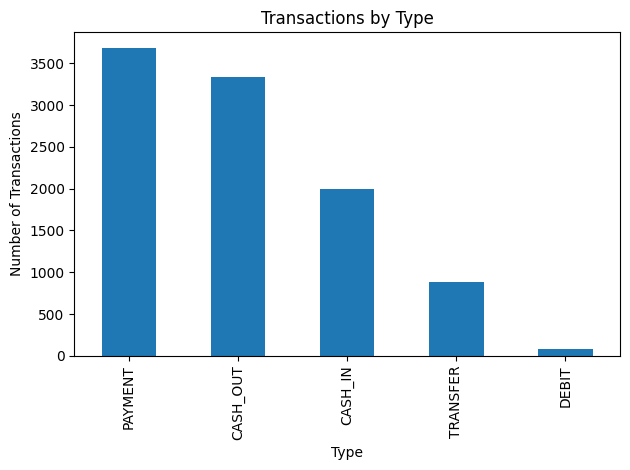

In [3]:
import matplotlib.pyplot as plt

typeCounts = df['type'].value_counts().sort_values(ascending=False)

plt.figure()
typeCounts.plot(kind='bar')
plt.title("Transactions by Type");plt.xlabel("Type");plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()

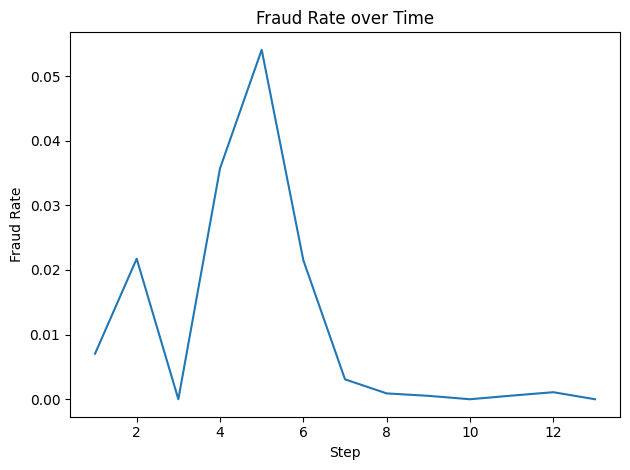

In [4]:
fraudByStep = df.groupby("step")["isFraud"].mean()

plt.figure()
fraudByStep.plot()
plt.title("Fraud Rate over Time");plt.xlabel("Step");plt.ylabel("Fraud Rate")
plt.tight_layout()
plt.show()

In [5]:
report_path = Path("../reports/kpi_snapshot.md")

lines = []
lines.append("# KPI Snapshot (PaySim Sample)\n")
lines.append("## Key Metrics\n")

for _, row in kpis.iterrows():
    lines.append(f"- **{row['KPI']}**: {row['Value']}")

report_path.write_text("\n".join(lines), encoding="utf-8")
print("Wrote:", report_path)


Wrote: ../reports/kpi_snapshot.md


## Insights

1) **Portfolio mix:** The transaction volume is concentrated in mostly payments and withdrawals, then simmers down into other types, see bar graph
2) **Value distribution:** Average Transaction value gives a nice baseline, but the data is likely positively skewed
3) **Fraud prevalence:** Fraud Rate is low, less that 1%
4) **Flagged Fraud Rate:** No transactions are flagged as possibly being fraud
5) **Time pattern:** Fraud Rate varies over time, but is prevvalent around the 5th step


In [6]:
insightFacts = {'Total transactions': kpiTotalTxns,
               'Total value': kpiTotalValue,
               'Average Value': kpiAvgValue,
               'Fraud Rate': kpiFraudRate,
               'Flagged Fraud Rate': kpiFlaggedRate}

insightFacts

{'Total transactions': 10000,
 'Total value': np.float64(1830226100.5900002),
 'Average Value': np.float64(183022.61005900003),
 'Fraud Rate': np.float64(0.0013),
 'Flagged Fraud Rate': np.float64(0.0)}

## Recommendations (what I would do next)

1) **Close the detection gap:**  
   Since flagged fraud is far below observed fraud by 0,13%, I would improve detection in two stages:
   - Add a small set of clear rules (velocity, unusually high amount vs customer baseline, new location maybe from the usual area)
   - Use logistic regression to detect these once they are above a certain threshold

2) **Operational monitoring:**  
   Set up a simple monitoring view for fraud rate over time:
   - Alert if fraud rate spikes above a threshold
   - Break down by transaction type to isolate which flow is driving the spike(Most likely withdrawals?)
